
# Cafe insights 


## First Import all the necessary Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Insert the data from CSV file 

In [19]:
data=pd.read_csv("/Users/basusharma/Downloads/Pandas/dirty_cafe.csv")

## Let's see the data duplicate values and null values

In [21]:
print(data.head(10)) # It only prints 10 rows of the data
print(data.duplicated(subset="Transaction ID").sum()) # It shows the duplicates in the term of true and false

print(data.isnull().sum()) # It shows how many null values in data 

  Transaction ID      Item Quantity Price Per Unit Total Spent  \
0    TXN_1961373    Coffee        2            2.0         4.0   
1    TXN_4977031      Cake        4            3.0        12.0   
2    TXN_4271903    Cookie        4            1.0       ERROR   
3    TXN_7034554     Salad        2            5.0        10.0   
4    TXN_3160411    Coffee        2            2.0         4.0   
5    TXN_2602893  Smoothie        5            4.0        20.0   
6    TXN_4433211   UNKNOWN        3            3.0         9.0   
7    TXN_6699534  Sandwich        4            4.0        16.0   
8    TXN_4717867       NaN        5            3.0        15.0   
9    TXN_2064365  Sandwich        5            4.0        20.0   

   Payment Method  Location Transaction Date  
0     Credit Card  Takeaway       2023-09-08  
1            Cash  In-store       2023-05-16  
2     Credit Card  In-store       2023-07-19  
3         UNKNOWN   UNKNOWN       2023-04-27  
4  Digital Wallet  In-store       2023

## Deal with null values and unwanted values 

In [22]:
data['Item'] = data['Item'].replace("UNKNOWN", "Pizza")# In item  replace UNKNOWN with Pizza and ERROR with Pasta
data['Item'] = data['Item'].replace("ERROR", "Pasta")

data["Item"]= data["Item"].fillna(method="bfill") # Used for backward fill

#print(data.head(50))                           #           Again i handle all the columns null and unwanted values

data['Quantity'] = data['Quantity'].replace("ERROR",4)
data["Quantity"]=data["Quantity"].fillna(method="ffill")
#print(data.isnull().sum())
data["Price Per Unit"]=data["Price Per Unit"].replace("ERROR",0)
data["Price Per Unit"]= data["Price Per Unit"].fillna(method="bfill")
#data.isnull().sum()

data["Total Spent"]=data["Total Spent"].replace("ERROR",8)
data["Total Spent"]=data["Total Spent"].replace("UNKNOWN",8)
#print(data.head(50))
data["Total Spent"] = pd.to_numeric(data["Total Spent"], errors='coerce') # It converts all the data to numeric values

#print(data["Total Spent"].mean())
data["Total Spent"]=data["Total Spent"].fillna(method="ffill")
#data.isnull().sum()
data["Payment Method"]=data["Payment Method"].replace("UNKNOWN","Cash")
data["Payment Method"]=data["Payment Method"].replace("ERROR","Credit Card")
data["Payment Method"]=data["Payment Method"].fillna(method="bfill")

data["Location"]=data["Location"].replace("UNKNOWN","In-store")
data["Location"]=data["Location"].replace("ERROR","Takeaway")
data["Location"]=data["Location"].fillna(method="bfill")
data["Transaction Date"]=data["Transaction Date"].replace("ERROR",pd.NA) #replace error with null values

# Convert to datetime, forcing errors to NaT (Not a Time)
data["Transaction Date"] = pd.to_datetime(data["Transaction Date"], errors="coerce")

data["Transaction Date"]=data["Transaction Date"].fillna(method="ffill")

# print(data.head(50))
data.isnull().sum()

/var/folders/jm/ll0137jj2_910x53zly8m1h40000gn/T/ipykernel_21119/3126414912.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Item"]= data["Item"].fillna(method="bfill") # Used for backward fill
/var/folders/jm/ll0137jj2_910x53zly8m1h40000gn/T/ipykernel_21119/3126414912.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Quantity"]=data["Quantity"].fillna(method="ffill")
/var/folders/jm/ll0137jj2_910x53zly8m1h40000gn/T/ipykernel_21119/3126414912.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Price Per Unit"]= data["Price Per Unit"].fillna(method="bfill")
/var/folders/jm/ll0137jj2_910x53zly8m1h40000gn/T/ipykernel_21119/3126414912.py:21: FutureWarning: Series.fillna with 'method' is deprecated and wi

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

## Data group by and data visualization with the help of pandas and matplotlib 

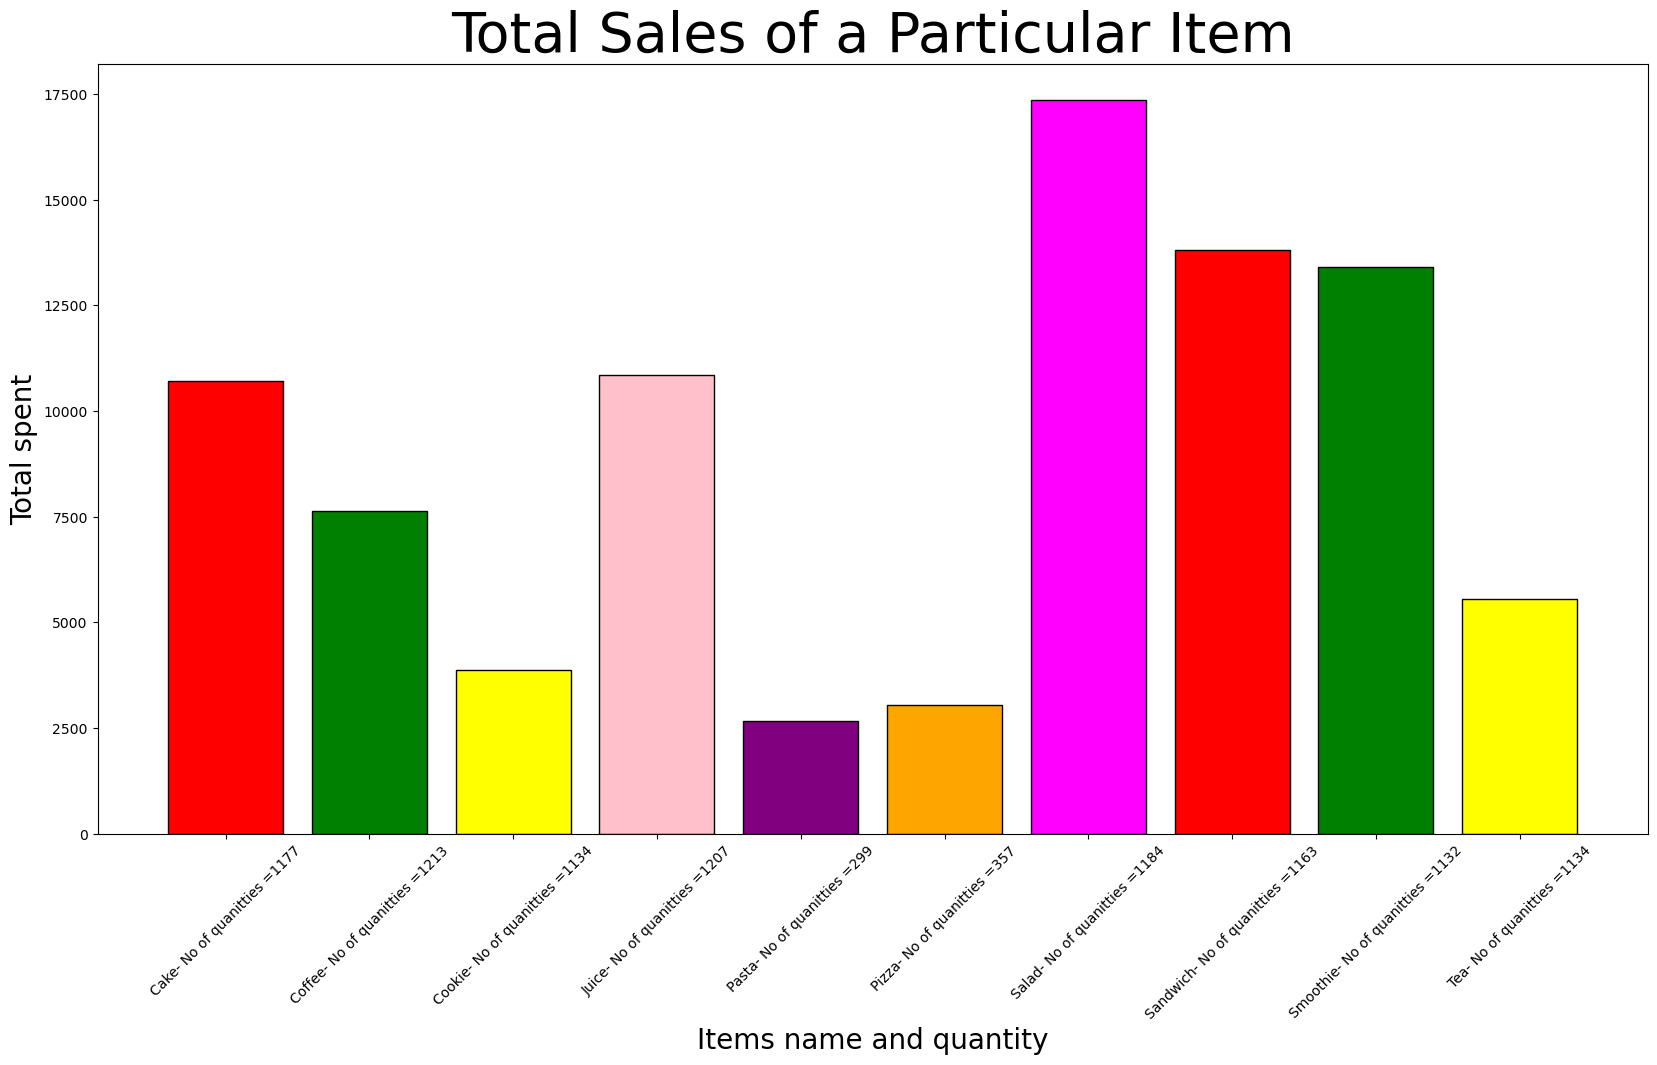

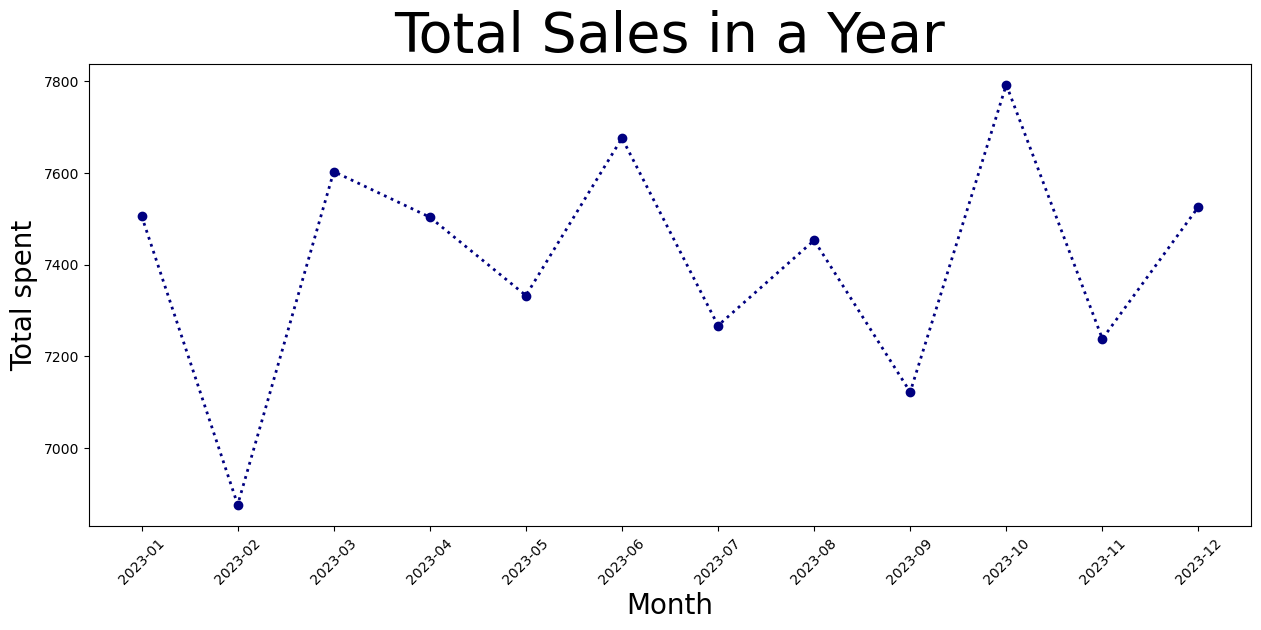

Text(0, 0.5, 'Total Spent ')

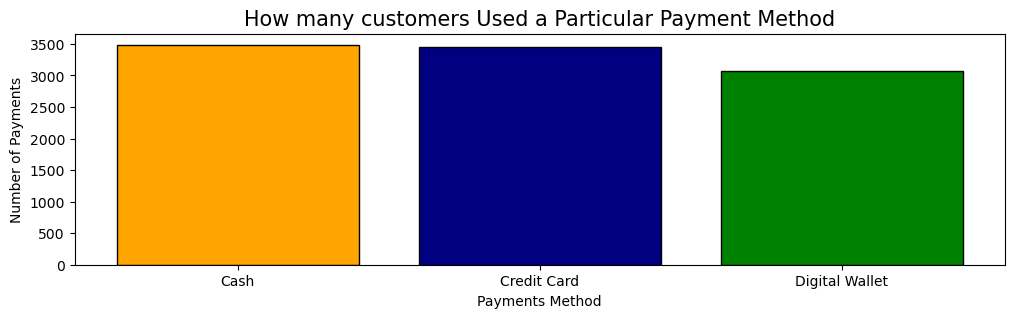

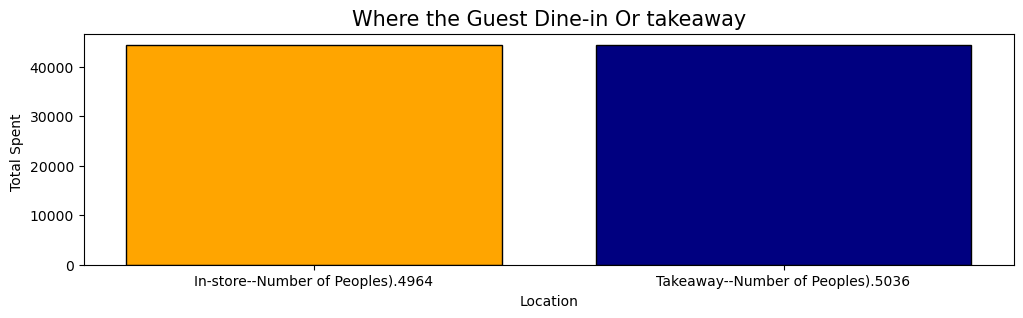

In [35]:
gp=data.groupby(["Item"]).agg({"Total Spent":"sum","Quantity":"count"})
gr=gp.reset_index()
#Matplolib
plt.figure(figsize=(20,10))
color=["red","green","yellow","pink","purple","orange","magenta",]
plt.bar(gr["Item"].astype(str)+"- No of quanitties ="+gr["Quantity"].astype(str),gr["Total Spent"],color=color,edgecolor="black")
plt.xticks(rotation=45)
plt.ylabel("Total spent",size=20,color="black")
plt.xlabel("Items name and quantity",size=20,color="black")
plt.title("Total Sales of a Particular Item",size=40)
plt.show()
data["Transaction Date"] = pd.to_datetime(data["Transaction Date"])

# Extract the month and year
data["Month"] = data["Transaction Date"].dt.to_period("M")
data["Transaction Date"] = pd.to_datetime(data["Transaction Date"], errors="coerce")
ss = data.groupby(["Month"]).agg({"Total Spent": "sum"})
rp=ss.reset_index()
#Matplolib
# Using plt.plot for a line chart with markers
plt.figure(figsize=(15,6))
plt.plot(rp["Month"].astype(str),rp["Total Spent"],marker="o",linestyle=":",color="navy",linewidth=2)
plt.xticks(rotation=45)
plt.ylabel("Total spent",size=20,color="black")
plt.xlabel("Month",size=20,color="black")
plt.title("Total Sales in a Year",size=40)
plt.show()



sd = data.groupby(["Payment Method"]).agg({"Total Spent": "count"})
sm=sd.reset_index()
#Matplolib for data v
color=["orange","navy","green"]
plt.figure(figsize=(12,3))
plt.bar(sm["Payment Method"].astype(str),sm["Total Spent"],color=color,edgecolor="black")
plt.title("How many customers Used a Particular Payment Method",size=15)
plt.xlabel("Payments Method",size=10,color="black")
plt.ylabel("Number of Payments",size=10,color="black")


sf = data.groupby(["Location"]).agg({"Transaction ID": "count","Total Spent":"sum"})
sn=sf.reset_index()
#Matplolib
color=["orange","navy","green"]
plt.figure(figsize=(12,3))
plt.bar(sn["Location"].astype(str)+"--Number of Peoples)."+sn["Transaction ID"].astype(str),sn["Total Spent"],color=color,edgecolor="black")
plt.title("Where the Guest Dine-in Or takeaway",size=15)
plt.xlabel("Location",size=10,color="black")
plt.ylabel("Total Spent ",size=10,color="black")






